In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bangla-newspaper-dataset/data_v2/data_v2.json
/kaggle/input/bangla-newspaper-dataset/data/data.json


# New Section

In [2]:
import json
with open(file='../input/bangla-newspaper-dataset/data/data.json', encoding='utf-8') as file:
    data=json.load(file)


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words = 1000)   #maximum word limit 1000
tokenizer.fit_on_texts(data[6]['content']) # fit sentence


In [4]:
tokenizer.get_config()

{'num_words': 1000,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 1429,
 'word_counts': '{"\\u09af": 38, "\\u09c1": 19, "\\u0995": 37, "\\u09cd": 83, "\\u09a4": 43, "\\u09b0": 102, "\\u09be": 102, "\\u09b7": 9, "\\u099f": 12, "\\u09c7": 84, "\\u09ac": 54, "\\u099c": 21, "\\u09bf": 64, "\\u098f": 11, "\\u09b8": 35, "\\u09aa": 38, "\\u09a7": 11, "\\u09a8": 71, "\\u09b9": 14, "\\u0993": 12, "\\u09bc": 29, "\\u0999": 5, "\\u0997": 21, "\\u09ae": 38, "\\u09c0": 29, "\\u0989": 8, "\\u09a6": 30, "\\u0996": 5, "\\u0986": 16, "\\u09b2": 44, "\\u099b": 5, "\\u0982": 5, "\\u09b6": 10, "\\u09cb": 15, "\\u0964": 11, "\\u09c3": 2, "\\u099a": 14, "\\u0981": 3, "\\u09a3": 9, "\\u09a0": 2, "\\u09cc": 3, "\\u09ad": 9, "\\u0985": 2, "\\u09a5": 8, "\\u2018": 3, "\\u0987": 11, "\\u2019": 3, "\\u09c2": 3, "\\u099e": 2, "\\u09e8": 1, "\\u09ab": 1, "\\u0988": 1, "\\u09a1": 1}',
 'word_docs': '{"\\u09af": 38, "\\u

In [5]:
from numpy.lib.arraysetops import unique

category_list = []
filterData = []
garbageCategory = []
garbageContent = []
for i in range(len(data)):
    category = data[i]['category']
    category_list.append(category);
    if category == '-1' or category == '22221' or category == 'we-are' :
      garbageCategory.append(data[i])
      continue
    if data[i]['content'] == '-1' :
      garbageContent.append(data[i])
      continue
    filterData.append(data[i])

print(len(garbageCategory))
print(len(garbageCategory))
len(filterData)

3133
3133


434784

In [6]:

new_category_list = []

for i in range(len(filterData)):
    new_category_list.append(filterData[i]['category'])


unique_category_list = np.unique(np.array(new_category_list))
print(len(unique_category_list))
print(unique_category_list)


27
['AskEditor' 'bangladesh' 'bondhushava' 'chakri-bakri' 'demo-content'
 'diverse' 'durporobash' 'economy' 'education' 'entertainment' 'events'
 'international' 'kishoralo' 'life-style' 'mpaward1' 'nagorik-kantho'
 'northamerica' 'onnoalo' 'opinion' 'pachmisheli' 'protichinta' 'roshalo'
 'special-supplement' 'sports' 'tarunno' 'technology' 'trust']


In [7]:
from collections import Counter
Counter(new_category_list)

Counter({'bangladesh': 232495,
         'sports': 49010,
         'technology': 12113,
         'entertainment': 30464,
         'international': 30855,
         'economy': 17245,
         'life-style': 10852,
         'opinion': 15698,
         'education': 9721,
         'onnoalo': 2701,
         'pachmisheli': 3443,
         'AskEditor': 1,
         'roshalo': 2604,
         'durporobash': 7401,
         'events': 2,
         'kishoralo': 508,
         'special-supplement': 859,
         'demo-content': 2,
         'trust': 443,
         'northamerica': 6990,
         'protichinta': 170,
         'bondhushava': 990,
         'mpaward1': 17,
         'diverse': 2,
         'tarunno': 40,
         'chakri-bakri': 75,
         'nagorik-kantho': 83})

In [8]:

category_count = []
for each_category in unique_category_list:
    count_of_each_category = category_list.count(each_category)
    category_count.append((each_category,count_of_each_category))

category_count.sort();
category_count


[('AskEditor', 1),
 ('bangladesh', 232504),
 ('bondhushava', 990),
 ('chakri-bakri', 75),
 ('demo-content', 2),
 ('diverse', 2),
 ('durporobash', 7402),
 ('economy', 17245),
 ('education', 9721),
 ('entertainment', 30466),
 ('events', 2),
 ('international', 30856),
 ('kishoralo', 508),
 ('life-style', 10852),
 ('mpaward1', 17),
 ('nagorik-kantho', 83),
 ('northamerica', 6990),
 ('onnoalo', 2702),
 ('opinion', 15699),
 ('pachmisheli', 3443),
 ('protichinta', 170),
 ('roshalo', 2604),
 ('special-supplement', 859),
 ('sports', 49012),
 ('tarunno', 40),
 ('technology', 12116),
 ('trust', 443)]

In [9]:
selected_category_list = []

for i in category_count:
     if( i[1] > 2500 ):
         selected_category_list.append(i[0])

print(len(selected_category_list))
selected_category_list

14


['bangladesh',
 'durporobash',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'northamerica',
 'onnoalo',
 'opinion',
 'pachmisheli',
 'roshalo',
 'sports',
 'technology']

In [10]:

features = []
target = []


for i in filterData:
    if i['category'] in selected_category_list:
        if target.count(i['category']) < 2500:
          features.append(i['content'])
          target.append(i['category'])


print(len(features))
print(len(target))

# Check dataset
print("Category: --",target[-1])
print("Content: --",features[-1])


35000
35000
Category: -- onnoalo
Content: -- সাইকেলতাহমিনা বেগম স্বপ্নে দেখেন, লিজার বাবা একটা নতুন সাইকেল নিয়ে ঢুকছেন উঠানে। তাঁকে খুব হাস্যোজ্জ্বল আর সুখী দেখাচ্ছে। লিজার মাকে দেখতে পেয়েই বললেন, ‘লিজার জন্য কিনে আনলাম। কত দিন ধরে আবদার করছে মেয়েটা।’‘কিন্তু লিজা তো নেই। তুমি যেন কিছুই জানো না!’লিজার বাবাকে খানিকটা বিচলিত দেখাল। তিনি লিজার মায়ের ভুল ভাঙাতে চাইলেন, ‘তুমি যেটা বলতেছ, সেটা একটা দুঃস্বপ্ন ছিল। এখন সব ঠিক হয়ে গেছে।’‘কিন্তু এখন কি আমি স্বপ্ন দেখতেছি না?’‘ওই যে, দেখো লিজা আসতেছে।’স্কুলের পোশাক পরা লিজা বেরোল ঘর থেকে। সে উঠানে এসে সাইকেলসহ বাবাকে দেখে খুশি হলো এবং সাইকেলটা নিয়ে উঠানের আয়তাকার জায়গাটাতে চালাতে চেষ্টা করল।তাহমিনা বেগম লক্ষ করলেন মেয়ের মাথার চুল এলোমেলোভাবে কাটা। হাত ও মুখে আঘাতের চিহ্ন। জঙ্গলে ওর মৃতদেহ পাওয়ার আগে কাটা চুলগুলো পাওয়া গিয়েছিল খালের পাড়ে। তাহমিনা বেগম মেয়ের এই হাল দেখে উদ্বিগ্ন হলেন।‘তাহলে সেটা কি সত্যিই দুঃস্বপ্ন ছিল?’‘হ্যাঁ।’‘কী দেখছিলা তুমি?’‘ঠিক তোমার দুঃস্বপ্নটার মতো। সব ঘটনাই এক।’‘কিন্তু স্বপ্ন দুটো একই রকম ছিল কি না, আমরা তো মিলায়া দেখি নাই।

In [11]:
# !pip install bnlp_toolkit
# !pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

# from bnlp import NLTKTokenizer
# from banglakit import lemmatizer as lem
# from banglakit.lemmatizer import BengaliLemmatizer

# import nltk
# from nltk.stem import WordNetLemmatizer

# nltk_tokenizer = NLTKTokenizer()
# lemmatizer = BengaliLemmatizer()

# # text = "আমার সোনার বাংলা, আমি তোমায় ভালবাসি।"
# # tokens = nltk_tokenizer.word_tokenize(text)
# # lemmatized_text = [lemmatizer.lemmatize(token) for token in tokens]


# # Tokenize the list of text.
# tokens_list = [nltk_tokenizer.word_tokenize(content) for content in features]

# # Apply lemmatization to each token in each list.
# lemmatized_tokens_list = []
# for tokens in tokens_list:
#     lemmatized_tokens = []
#     for token in tokens:
#         lemmatized_tokens.append(lemmatizer.lemmatize(token))
#     lemmatized_tokens_list.append(lemmatized_tokens)

# # Join the tokens back into a single string for each text in the list.
# # lemmatized_text_list = [' '.join(tokens) for tokens in lemmatized_tokens_list]



/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
ERROR: Could not find a version that satisfies the requirement bnlp_toolkit (from versions: none)
ERROR: No matching distribution found for bnlp_toolkit
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-install-5uj8zpbv/banglakit-lemmatizer_ed61e98586604c60902496f90825bf33
  Running command git clone --filter=blob:none --quiet https://github.com/banglakit/lemmatizer.git /tmp/pip-install-5uj8zpbv/banglakit-lemmatizer_ed61e98586604c60902496f90825bf33
  fatal: unable to access 'https://github.com/banglakit/lemmatizer.git/': Could not resolve host: github.com
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/banglakit/lemmatizer.git /tmp/pip-install-5uj8zpbv/banglakit-lemmatizer_ed61e98586604c60902496f90825bf33 did not run successf

ModuleNotFoundError: No module named 'bnlp'

In [12]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

en_target=le.fit_transform(target)

set(en_target)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [16]:
from sklearn.model_selection import train_test_split


train_content, test_content, train_category, test_category = train_test_split(features, en_target, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)


print(len(train_content))
print(len(test_content))

28000
7000


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
train_vectors = vectorizer.fit_transform(train_content)
test_vectors = vectorizer.transform(test_content)

# Label encode the class labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_category)
test_labels = label_encoder.transform(test_category)


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# define the best hyperparameters
params = {
    'alpha': 0.5,  # Laplace smoothing parameter
    'fit_prior': True,  # whether to learn class prior probabilities or not
}


alphas = [5, 1, 0.5, 0.1, 0.01, 0.001]
train_scores = []
test_scores = []
train_loss = []
test_loss = []
for alpha in alphas:
    nb_clf = MultinomialNB(alpha=alpha, fit_prior=True)
    nb_clf.fit(train_vectors, train_labels)
    
    train_pred = nb_clf.predict(train_vectors)
    test_pred = nb_clf.predict(test_vectors)
    
    train_scores.append(accuracy_score(train_labels, train_pred))
    train_loss.append(mean_squared_error(train_labels, train_pred))
    class_report = classification_report(train_labels, train_pred)
    print(class_report)
    
    test_scores.append(accuracy_score(test_labels, test_pred))
    test_loss.append(mean_squared_error(test_labels, test_pred))
    class_report = classification_report(test_labels, test_pred)
    print(class_report)



              precision    recall  f1-score   support

           0       0.83      0.72      0.77      2022
           1       0.48      0.54      0.51      2010
           2       0.90      0.71      0.80      1994
           3       0.99      0.57      0.73      1995
           4       0.96      0.46      0.62      1947
           5       0.98      0.40      0.57      1987
           6       0.83      0.56      0.67      2025
           7       0.55      0.67      0.60      2033
           8       0.29      0.94      0.44      2008
           9       0.32      0.91      0.47      2005
          10       0.94      0.13      0.23      1993
          11       0.96      0.11      0.19      1998
          12       0.98      0.75      0.85      2009
          13       0.93      0.58      0.71      1974

    accuracy                           0.58     28000
   macro avg       0.78      0.58      0.58     28000
weighted avg       0.78      0.58      0.58     28000

              precision  

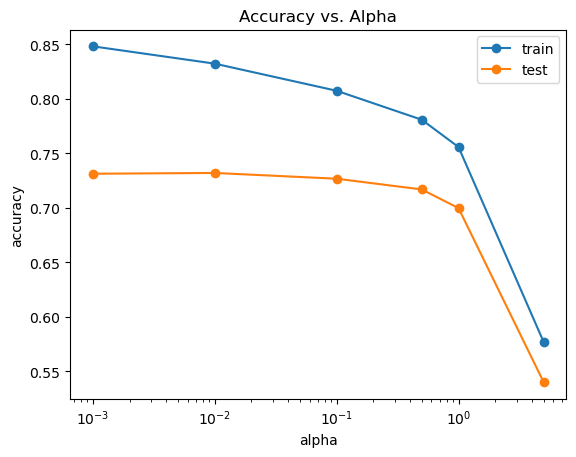

In [19]:
plt.plot(alphas, train_scores, '-o', label='train')
plt.plot(alphas, test_scores, '-o', label='test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('accuracy')
plt.title('Accuracy vs. Alpha')
plt.legend()
plt.show()

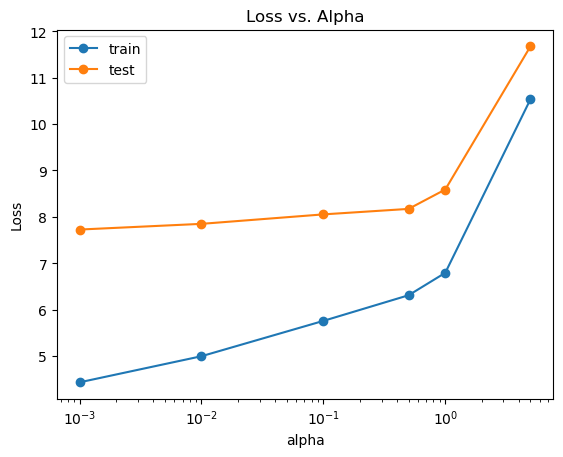

In [20]:
plt.plot(alphas, train_loss, '-o', label='train')
plt.plot(alphas, test_loss, '-o', label='test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Loss')
plt.title('Loss vs. Alpha')
plt.legend()
# plt.savefig('MultinomialNB_Loss.png')
plt.show()

<AxesSubplot:>

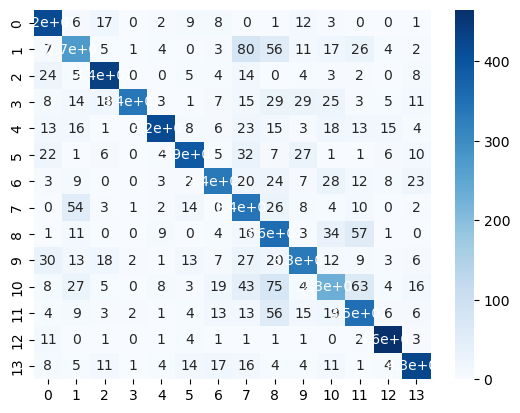

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(test_labels, test_pred)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

In [ ]:
for i in range(14):
    print(selected_category_list[i])